In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  #0부터 1사이의 숫자로 만들어 주기 위해 (좀 더 빠르게 하려고)
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [22]:
# Build the model
i = Input(shape=x_train[0].shape) # (28, 28)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile and train
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
r  = model.fit(x_train, y_train, 
            epochs=5,
            validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 49s 815us/sample - loss: 0.3257 - acc: 0.8960 - val_loss: 0.1285 - val_acc: 0.9597
Epoch 2/5
60000/60000 [==============================] - 46s 767us/sample - loss: 0.0998 - acc: 0.9698 - val_loss: 0.0747 - val_acc: 0.9783
Epoch 3/5
60000/60000 [==============================] - 44s 737us/sample - loss: 0.0711 - acc: 0.9786 - val_loss: 0.0601 - val_acc: 0.9814
Epoch 4/5
60000/60000 [==============================] - 44s 740us/sample - loss: 0.0537 - acc: 0.9840 - val_loss: 0.0623 - val_acc: 0.9807
Epoch 5/5
60000/60000 [==============================] - 44s 740us/sample - loss: 0.0454 - acc: 0.9856 - val_loss: 0.0420 - val_acc: 0.9874


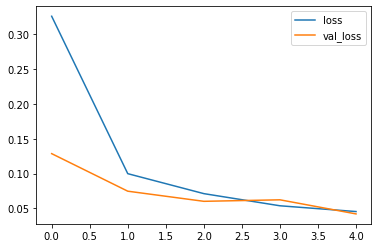

In [25]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

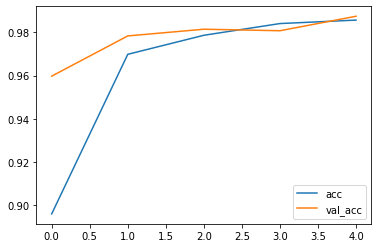

In [26]:
# plot accuracy per iteration
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 974    0    1    0    0    0    4    1    0    0]
 [   1 1129    0    0    0    0    2    2    1    0]
 [   0    1 1025    0    1    0    1    2    2    0]
 [   0    0    6  994    0    1    0    5    4    0]
 [   0    0    1    0  961    0    5    0    2   13]
 [   2    2    0    9    0  870    3    1    4    1]
 [   2    2    0    0    2    3  948    0    1    0]
 [   0    2    7    1    2    0    0 1013    0    3]
 [   0    0    1    0    0    1    2    4  962    4]
 [   1    0    0    1    1    1    0    3    4  998]]


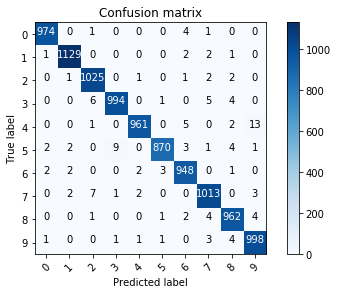

In [27]:

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion matrix', cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

Text(0.5, 1.0, 'True label: 7, Predicted: 2')

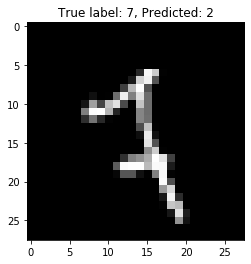

In [28]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: {}, Predicted: {}".format(y_test[i], p_test[i]))